In [1]:
import numpy
import matplotlib
from matplotlib import pyplot
from matplotlib.lines import Line2D
import os
import scipy.special

pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
  "text.latex.preamble": r"\usepackage{amsmath}"
})

In [2]:
output_dir = "paper_plots"

os.makedirs(output_dir, exist_ok=True)

# States with Macroscopy particle imbalance

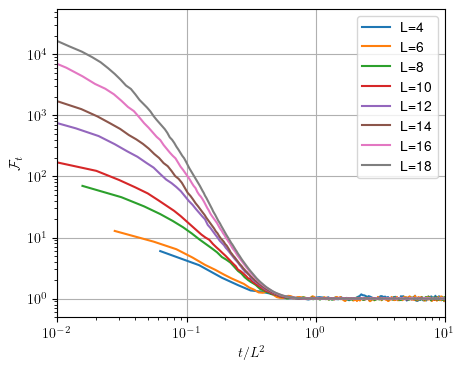

Num experiments: 10000


In [3]:
arr = numpy.load(os.path.join("half_filling", "all_defects_left.npz"))
half_filling_left_purities = arr['data']
half_filling_left_ls = arr['ls']
half_filling_left_ds = arr['Ds']

# for d, l, purity in zip(half_filling_left_ds, half_filling_left_ls, half_filling_left_purities):
#     T = len(purity)
#     pyplot.plot(numpy.arange(1,T+1), (purity)/d, label=f"L={l}")
    
# pyplot.xlabel('$t$')
# pyplot.ylabel('$F_t/D$')
# pyplot.yscale('log')
# # pyplot.xscale('log')
# pyplot.xlim([-0.1,50])
# pyplot.legend()
# pyplot.grid()
# pyplot.show()


# for d, l, purity in zip(half_filling_left_ds, half_filling_left_ls, half_filling_left_purities):
#     T = len(purity)
#     pyplot.plot(numpy.arange(1,T+1)/l**2, (purity)/d, label=f"L={l}")
    
# pyplot.xlabel('$t/L^2$')
# pyplot.ylabel('$F_t/D$')
# pyplot.yscale('log')
# pyplot.xscale('log')
# pyplot.legend()
# pyplot.grid()
# pyplot.show()


fig, ax = pyplot.subplots(figsize=[5, 4])

for d, l, purity in zip(half_filling_left_ds, half_filling_left_ls, half_filling_left_purities):
    T = len(purity)
    ax.plot(numpy.arange(1,T+1)/l**2, (purity), label=f"L={l}")
    
ax.set_xlabel('$t/L^2$')
ax.set_ylabel('$\mathcal{F}_t$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1e-2,1e1])
# pyplot.ylim([5e-1,1e3])
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, "fig_2b.pdf"))
pyplot.show()


# for d, l, purity in zip(half_filling_left_ds, half_filling_left_ls, half_filling_left_purities):
#     T = len(purity)
#     pyplot.plot(numpy.arange(1,T+1)/l**2, (purity), label=f"L={l}")
    
# pyplot.xlabel('$t/L^2$')
# pyplot.ylabel('$F_t$')
# pyplot.yscale('log')
# # pyplot.xscale('log')
# pyplot.xlim([1e-2,0.5])
# # pyplot.ylim([5e-1,1e3])
# pyplot.legend()
# pyplot.grid()
# pyplot.show()

print("Num experiments: {}".format(half_filling_left_purities.shape[1]))

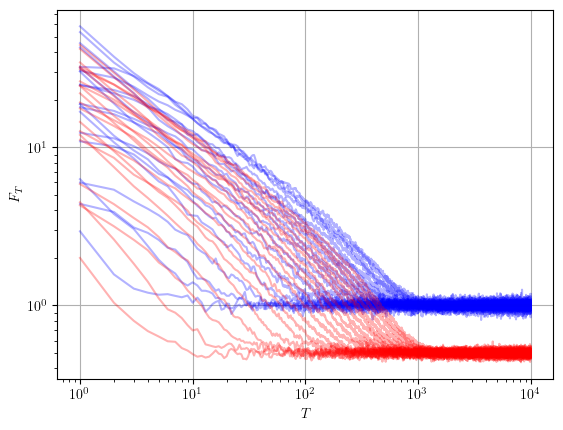

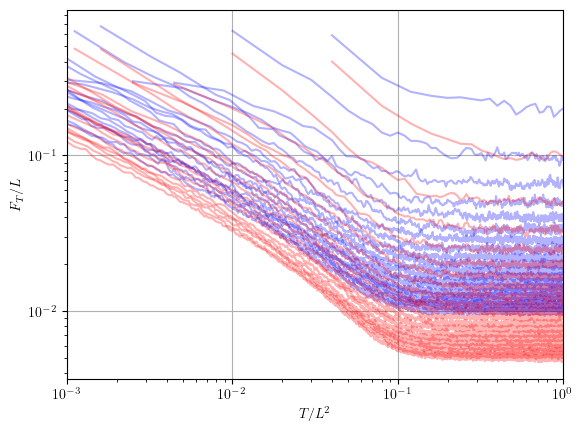

Num pure experiments: 10000
Num mixed experiments: 10000


In [4]:
arr = numpy.load(os.path.join("merge_single_double_filling", f'adjusted_dimer_and_dephased.npz'))
dimer_ls = arr['ls']
dimer_all_purities = arr['data']
dimer_all_mixed_purities = arr['data_mixed']

for l,pur in zip(dimer_ls, dimer_all_purities):
    pyplot.plot(numpy.arange(1,len(pur)+1), pur, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    pyplot.plot(numpy.arange(1,len(pur)+1), pur, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F_T$')
pyplot.xlabel('$T$')
pyplot.show()


for l,pur in zip(dimer_ls, dimer_all_purities):
    pyplot.plot(numpy.arange(1,len(pur)+1)/l**2, pur/l, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    pyplot.plot(numpy.arange(1,len(pur)+1)/l**2, pur/l, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.xlim([1e-3, 1])
pyplot.yscale('log')
pyplot.ylabel('$F_T/L$')
pyplot.xlabel('$T/L^2$')
pyplot.show()


print("Num pure experiments: {}".format(dimer_all_purities.shape[1]))
print("Num mixed experiments: {}".format(dimer_all_mixed_purities.shape[1]))

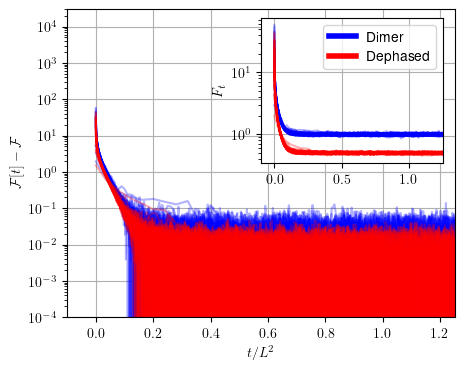

In [5]:
fig, ax = pyplot.subplots(figsize=[5, 4])

for l,pur in zip(dimer_ls, dimer_all_purities):
    ax.plot(numpy.arange(len(pur))/l**2, pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    ax.plot(numpy.arange(len(pur))/l**2, pur - 0.5, c='red', alpha=0.3)

# for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
#     ax.plot(numpy.arange(len(purity)) / (l**2), purity - 1.0, c='green', alpha=0.5)

ax.set_ylim([1e-4,3e4])
ax.set_xlim([-0.1,1.25])
ax.set_xlabel(r'$t/L^2$')
ax.set_ylabel(r'$\mathcal{F}[t] - \mathcal{F}$')
ax.set_yscale('log')
# pyplot.xscale('log')
ax.grid()

axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
for l,pur in zip(dimer_ls, dimer_all_purities):
    axins.plot(numpy.arange(len(pur))/l**2, pur, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    axins.plot(numpy.arange(len(pur))/l**2, pur, c='red', alpha=0.3)

# for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
#     axins.plot(numpy.arange(len(purity)) / (l**2), purity, c='green', alpha=0.5)

axins.set_yscale('log')
axins.set_xlim([-0.1,1.25])
axins.set_ylabel(r'$F_t$')
axins.grid()
    
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]
                #Line2D([0], [0], color='green', lw=4)]
axins.legend(custom_lines, ['Dimer', 'Dephased'])
                            #, 'All-Left'])
    
# pyplot.savefig(os.path.join(output_dir, 'fig_2.pdf'))
pyplot.show()

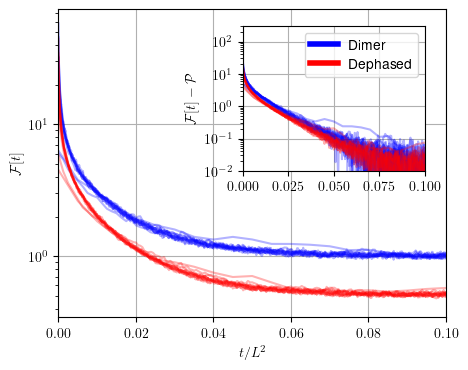

[ 10  20  30  40  50  60  70  80  90 100]


In [6]:
fig, ax = pyplot.subplots(figsize=[5, 4])
axins = ax.inset_axes([0.475, 0.475, 0.47, 0.47])

ax, axins = axins, ax

for l,pur in zip(dimer_ls[1::2], dimer_all_purities[1::2]):
    ax.plot((0.5*numpy.arange(len(pur)))/l**2, pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls[1::2], dimer_all_mixed_purities[1::2]):
    ax.plot((0.5*numpy.arange(len(pur)))/l**2, pur - 0.5, c='red', alpha=0.3)

# for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
#     ax.plot(numpy.arange(len(purity)) / (l**2), numpy.abs(purity - 1.0), c='green', alpha=0.5)

ax.set_ylim([1e-2,3e2])
ax.set_xlim([0.0,0.1])
ax.set_ylabel(r'$\mathcal{F}[t] - \mathcal{P}$')
ax.set_yscale('log')
# pyplot.xscale('log')
ax.grid()

for l, pur in zip(dimer_ls[1::2], dimer_all_purities[1::2]):
    axins.plot((0.5*numpy.arange(len(pur)))/l**2, pur, c='blue', alpha=0.3)
for l, pur in zip(dimer_ls[1::2], dimer_all_mixed_purities[1::2]):
    axins.plot((0.5*numpy.arange(len(pur)))/l**2, pur, c='red', alpha=0.3)

# for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
#     axins.plot(numpy.arange(len(purity)) / (l**2), purity, c='green', alpha=0.5)

axins.set_yscale('log')
axins.set_xlim([-0.0,0.1])
axins.set_ylabel(r'$\mathcal{F}[t]$')
axins.grid()
    

custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]
                #Line2D([0], [0], color='green', lw=4)]
ax.legend(custom_lines, ['Dimer', 'Dephased'])#, 'All-Left'])

axins.set_xlabel(r'$t/L^2$')

pyplot.savefig(os.path.join(output_dir, 'fig_2.pdf'))
pyplot.show()

print(dimer_ls[1::2])

# Variance Plots

In [7]:
def theory_variance(ls,k,M):
    return (k * M * (k - ls) * (-ls + M))/((-1 + ls) * ls**2)
   
def haar_theory_variance(L,k,M):
    Dm = scipy.special.binom(L,M)
    return 1/(1 + 1.0/Dm) * theory_variance(L,k,M)

In [8]:
arr = numpy.load(os.path.join("neelstate_and_density_variance", "neel_state_dens_var.npz"))
neel_ls = arr['ls']
neel_purities = arr['data']
neel_densities = arr['dens']
neel_variances = arr['var']
neel_hilbert_space_sizes = arr['Ds']

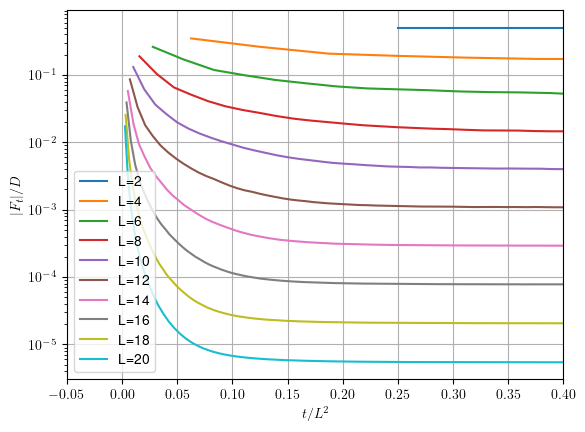

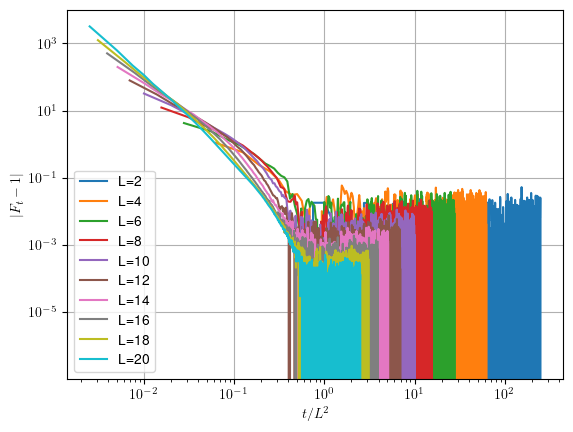

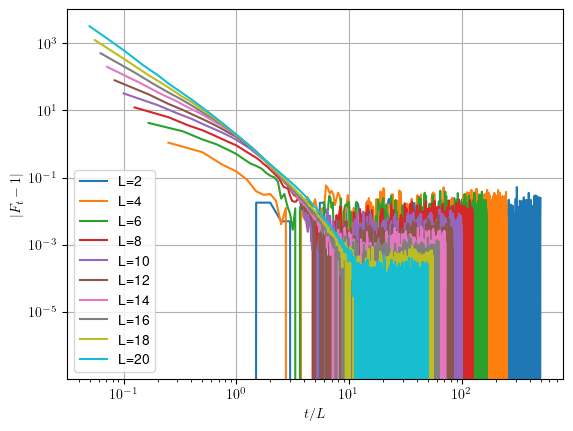

In [9]:
for d, l, purity in zip(neel_hilbert_space_sizes, neel_ls, neel_purities):
    pyplot.plot(numpy.arange(1,len(purity)+1)/(l**2), purity/d, label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\vert F_t\vert/D $')
# pyplot.xscale('log')
pyplot.yscale('log')
pyplot.xlim([-0.05,0.4])
pyplot.legend()
pyplot.grid()
pyplot.show()

for d, l, purity in zip(neel_hilbert_space_sizes, neel_ls, neel_purities):
    pyplot.plot(numpy.arange(1,len(purity)+1)/(l**2), purity - 1, label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\vert F_t - 1\vert $')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.show()
pyplot.show()

for d, l, purity in zip(neel_hilbert_space_sizes, neel_ls, neel_purities):
    pyplot.plot(numpy.arange(1,len(purity)+1)/(l), purity - 1, label=f"L={l}")
    
pyplot.xlabel('$t/L$')
pyplot.ylabel(r'$\vert F_t - 1\vert $')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.show()

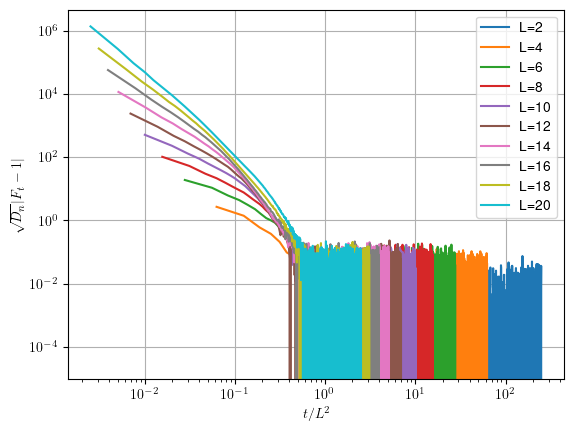

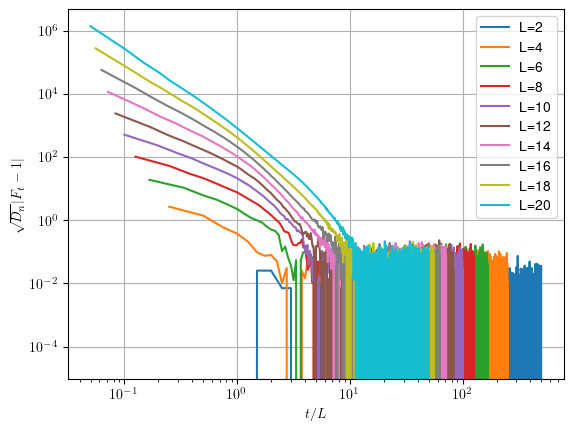

In [10]:
for d, l, purity in zip(neel_hilbert_space_sizes, neel_ls, neel_purities):
    pyplot.plot(numpy.arange(1,len(purity)+1)/(l**2), numpy.sqrt(d) * (purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\sqrt{D_n} \vert F_t - 1\vert $')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.show()
pyplot.show()

for d, l, purity in zip(neel_hilbert_space_sizes, neel_ls, neel_purities):
    pyplot.plot(numpy.arange(1,len(purity)+1)/(l), numpy.sqrt(d) * (purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L$')
pyplot.ylabel(r'$\sqrt{D_n} \vert F_t - 1\vert $')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.show()
pyplot.show()

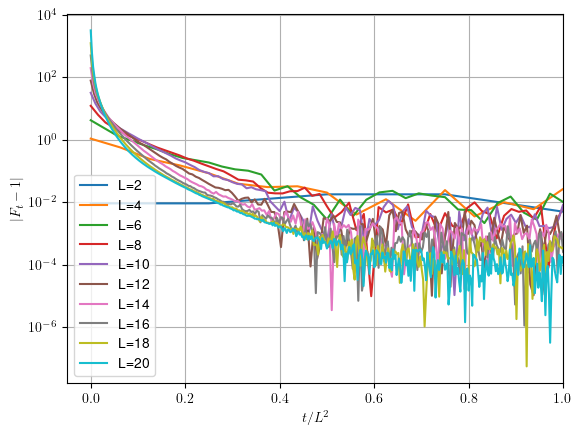

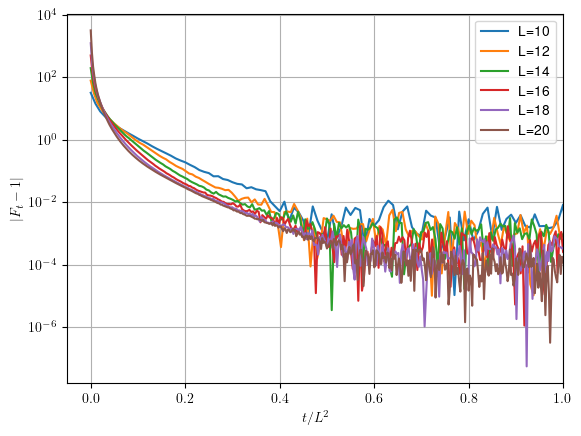

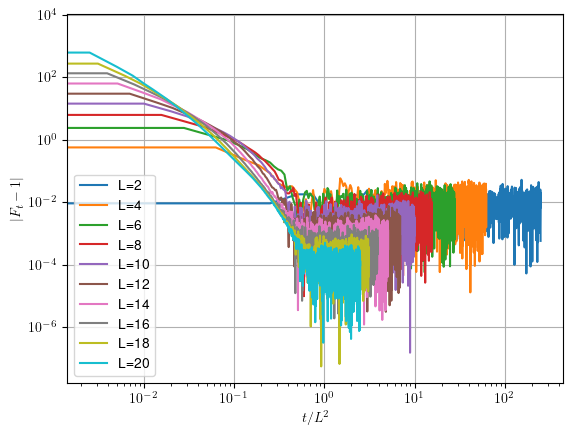

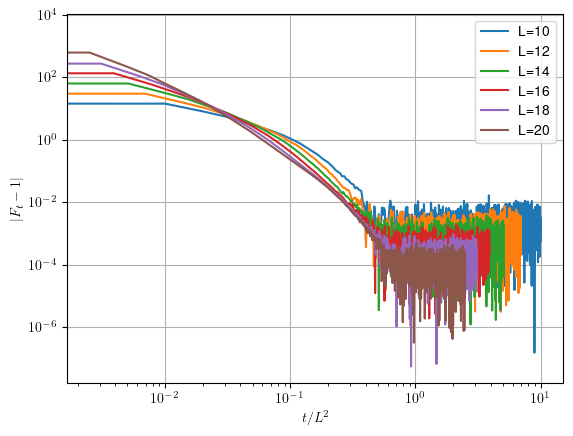

Num neel experiments: 1000


In [11]:
for d, l, purity in zip(neel_hilbert_space_sizes, neel_ls, neel_purities):
    pyplot.plot(numpy.arange(len(purity))/(l**2), numpy.abs(purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\vert F_t - 1\vert $')
# pyplot.xscale('log')
pyplot.yscale('log')
pyplot.xlim([-0.05,1e0])
pyplot.legend()
pyplot.grid()
pyplot.show()

for d, l, purity in zip(neel_hilbert_space_sizes[4:], neel_ls[4:], neel_purities[4:]):
    pyplot.plot(numpy.arange(len(purity))/(l**2), numpy.abs(purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\vert  F_t - 1\vert $')
# pyplot.xscale('log')
pyplot.yscale('log')
pyplot.xlim([-0.05,1e0])
pyplot.legend()
pyplot.grid()
pyplot.show()

for d, l, purity in zip(neel_hilbert_space_sizes, neel_ls, neel_purities):
    pyplot.plot(numpy.arange(len(purity))/(l**2), numpy.abs(purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\vert F_t - 1\vert $')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.show()

for d, l, purity in zip(neel_hilbert_space_sizes[4:], neel_ls[4:], neel_purities[4:]):
    pyplot.plot(numpy.arange(len(purity))/(l**2), numpy.abs(purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\vert F_t - 1\vert $')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.show()

print("Num neel experiments: {}".format(neel_purities.shape[1]))

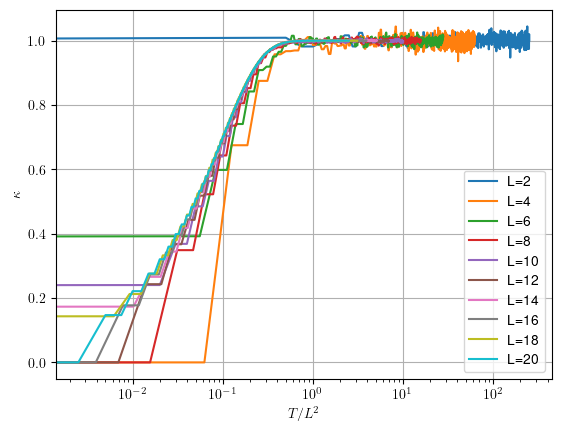

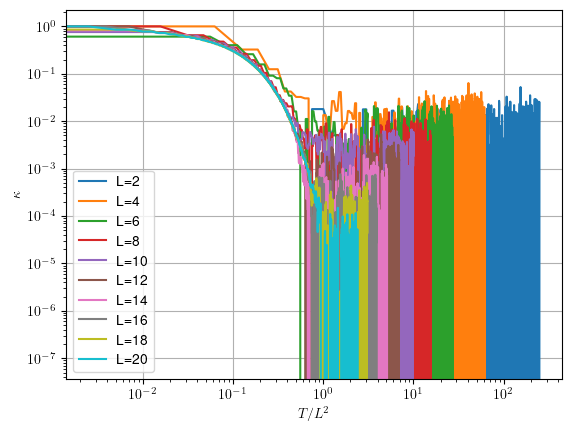

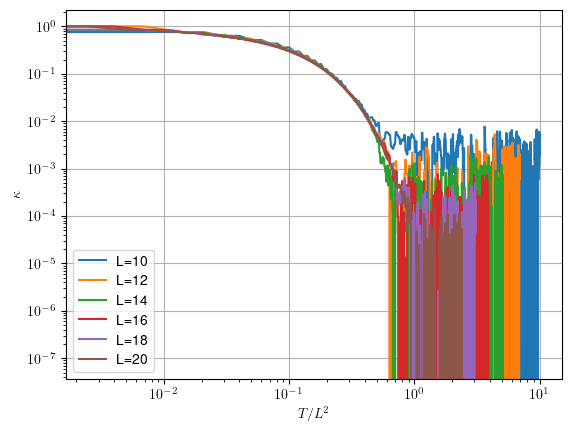

In [12]:
for l,v in zip(neel_ls, neel_variances):
    pyplot.plot(numpy.arange(len(v))/l**2, v/haar_theory_variance(l,l/2,l/2), label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\kappa$')
pyplot.xlabel(r'$T / L^2$')
pyplot.xscale('log')
pyplot.grid()
pyplot.show()

for l,v in zip(neel_ls, neel_variances):
    pyplot.plot(numpy.arange(len(v))/l**2, 1.0 - v/haar_theory_variance(l,l/2,l/2), label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\kappa$')
pyplot.xlabel(r'$T / L^2$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.grid()
pyplot.show()

for l,v in zip(neel_ls[4:], neel_variances[4:]):
    pyplot.plot(numpy.arange(len(v))/l**2, 1.0 - v/haar_theory_variance(l,l/2,l/2), label=f'L={l}')
pyplot.legend()
pyplot.ylabel(r'$\kappa$')
pyplot.xlabel(r'$T / L^2$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.grid()
pyplot.show()

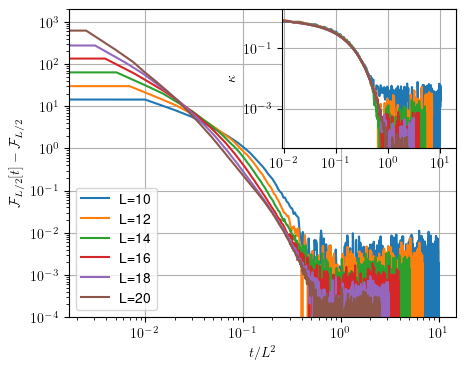

In [13]:
fig, ax = pyplot.subplots(figsize=[5, 4])
axins = ax.inset_axes([0.55, 0.55, 0.45, 0.45])

# for d, l, purity in zip(neel_hilbert_space_sizes[4:], neel_ls[4:], neel_purities[4:]):
#     ax.plot(numpy.arange(len(purity))/(l**2), numpy.abs(purity - 1), label=f"L={l}")
for d, l, purity in zip(neel_hilbert_space_sizes[4:], neel_ls[4:], neel_purities[4:]):
    ax.plot(numpy.arange(len(purity))/(l**2), purity - 1, label=f"L={l}")

ax.set_ylabel(r'$ \mathcal{F}_{L/2}[t] - \mathcal{F}_{L/2} $')
ax.set_xlabel(r'$t/L^2$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-4,2e3])
ax.grid()

for l,v in zip(neel_ls[4:], neel_variances[4:]):
    axins.plot(numpy.arange(len(v))/l**2, 1.0 - v/haar_theory_variance(l,l/2,l/2), label=f'L={l}')

# for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
#     axins.plot(numpy.arange(len(purity)) / (l**2), purity, c='green', alpha=0.5)

axins.set_yscale('log')
axins.set_ylim([5e-5, 2e0])
axins.set_xlim([9e-3, 2e1])
axins.set_ylabel(r'$\kappa$')
axins.set_xscale('log')
axins.set_yscale('log')
axins.set_xticks([1e-2,1e-1,1e0,1e1], minor=False)
axins.grid()

ax.legend(loc='lower left')

pyplot.savefig(os.path.join(output_dir, 'fig_3.pdf'))
pyplot.show()

# Uniform Plot

In [14]:
arr = numpy.load(os.path.join("double_triple_filling", "2_defects_deloc.npz"))
uniform_ls = arr['ls']
uniform_pure_purities = arr['data']
uniform_initial_purities = arr['initial_purities']
uniform_hilbert_space_sizes = arr['Ds']

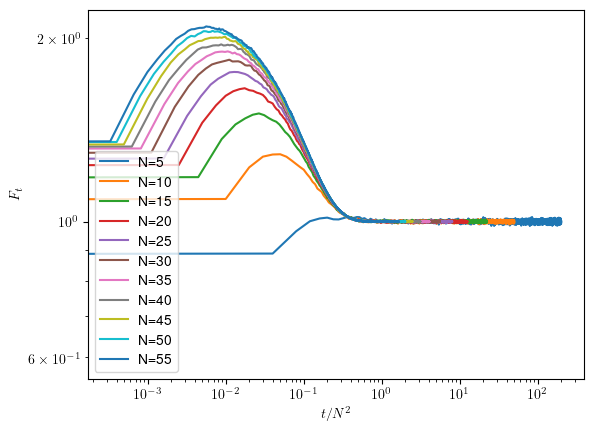

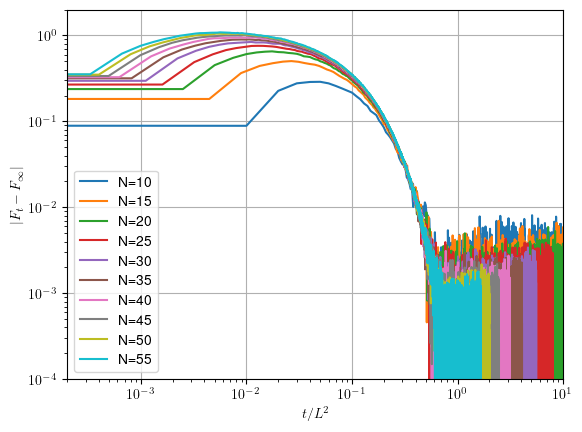

Uniform experiments: 5000


In [15]:
for n, purity in zip(uniform_ls, uniform_pure_purities):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity, label=f"N={n}")
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(uniform_ls[1:], uniform_pure_purities[1:]):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), numpy.abs(purity - 1), label=f"N={n}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\vert F_t - F_\infty \vert$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylim([1e-4,2e0])
pyplot.xlim([2e-4,1e1])
pyplot.legend(loc="lower left")
pyplot.grid()
pyplot.show()

print("Uniform experiments: {}".format(uniform_pure_purities.shape[1]))

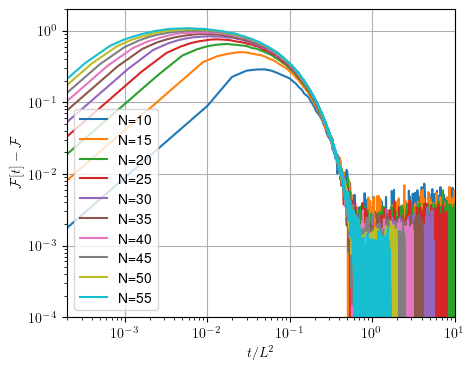

In [16]:
fig, ax = pyplot.subplots(figsize=[5, 4])

for n, purity in zip(uniform_ls[1:], uniform_pure_purities[1:]):
    l = len(purity)
    pyplot.plot(numpy.arange(l)/(n**2), purity - 1, label=f"N={n}")

ax.set_xlabel('$t/L^2$')
ax.set_ylabel(r'$\mathcal{F}[t] - \mathcal{F}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-4,2e0])
ax.set_xlim([2e-4,1e1])
ax.legend(loc="lower left")
ax.grid()
pyplot.savefig(os.path.join(output_dir, 'fig_4.pdf'))
pyplot.show()

## Mixed states

Dephasing proc.
- Mixed state with purity scaling as f(D)?

$\vert \psi \rangle \langle \psi \vert$

$ P(0) P_0 \vert \psi \rangle \langle \psi \vert P_0 + P(1) P_1 \vert \psi \rangle \langle \psi \vert P_1$

- Dimers (on few or all sites?)
- Uniform (1, 2, L/2?)
- Delocalized dimers on left half of domain wall state

## Subsystem purity

In [17]:
arr = numpy.load(os.path.join("half_purity", "subsystem_purity.npz"))
subsystem_all_purities = arr['data']
subsystem_all_trace_purities = arr['subsystem_data']
subsystem_ns = arr['ls']

In [18]:
subsystem_ns

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38])

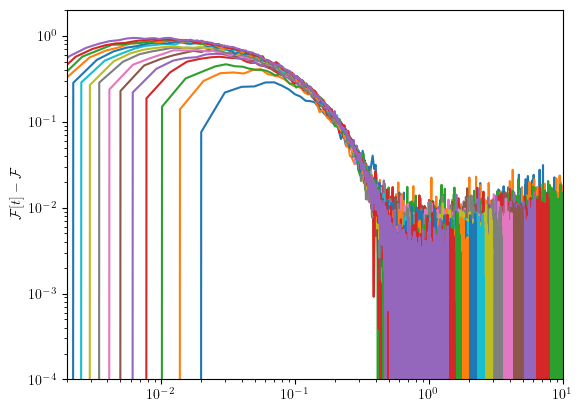

In [19]:
fig, ax = pyplot.subplots()

for n, purity in zip(subsystem_ns[4:], subsystem_all_purities[4:]):
    ax.plot(numpy.arange(len(purity))/(n**2), purity - 1, label=f"N={n}")

ax.set_ylabel(r'$\mathcal{F}[t] - \mathcal{F}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-4,2e0])
ax.set_xlim([2e-3,1e1])
pyplot.show()

In [20]:
def theory(L):
    return (-16 + L*(12 + L*(4 + L)))/(8*(-1 + L)*(2 + (-1 + L)*L))

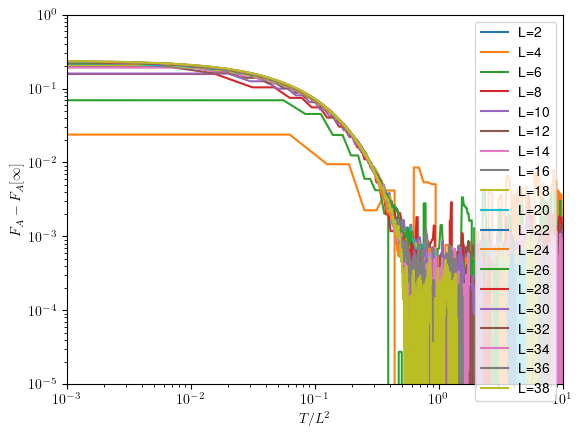

In [21]:
for n,trace_purity in zip(subsystem_ns,subsystem_all_trace_purities):
    pyplot.plot(numpy.arange(len(trace_purity))/n**2, trace_purity - theory(n), label=f"L={n}")
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.xlabel('$T/L^2$')
pyplot.ylabel('$F_A - F_A[\infty]$')
pyplot.ylim([1e-5,1e0])
pyplot.xlim([1e-3,1e1])
pyplot.legend(loc='upper right')
pyplot.show()

## Charge Imbalance Plots

In [22]:
single_filename = os.path.join("half_filling", "occupation_imbalance_lessT_moreL.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    ls = arr['ls']
    pure_purities = arr['data']
    hilbert_space_sizes = arr['Ds']
    all_densities = [arr[f"dens_{l}"] for l in ls]

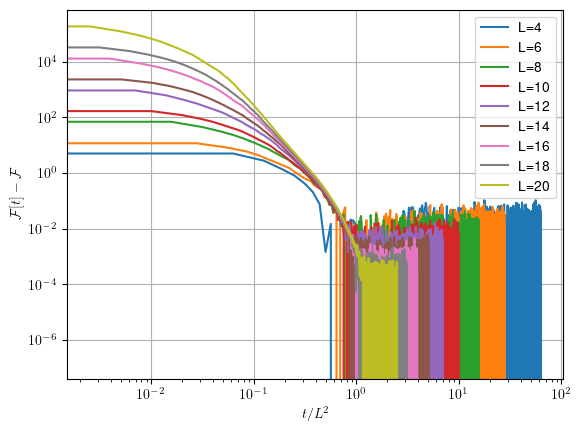

In [23]:
for l, purity in zip(ls, pure_purities):
    pyplot.plot(numpy.arange(len(purity)) / (l**2), (purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\mathcal{F}[t] - \mathcal{F}$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.show()

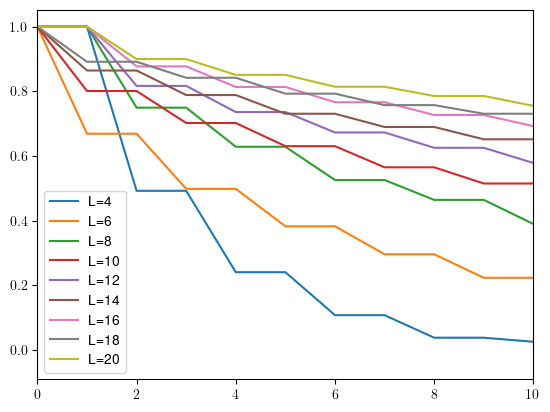

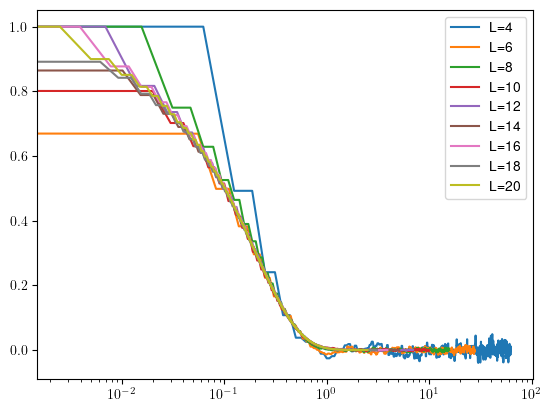

In [24]:
for l,dens in zip(ls,all_densities):
    pyplot.plot(dens[:,:l//2].mean(axis=-1) - dens[:,l//2:].mean(axis=-1), label=f"L={l}")
# pyplot.xscale('log')
pyplot.xlim([0,10])
pyplot.legend()
pyplot.show()

for l,dens in zip(ls,all_densities):
    pyplot.plot(numpy.arange(dens.shape[0])/l**2, dens[:,:l//2].mean(axis=-1) - dens[:,l//2:].mean(axis=-1), label=f"L={l}")
pyplot.xscale('log')
pyplot.legend()
pyplot.show()

## Combined plots

/tmp/ipykernel_28978/3696786268.py:137: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  pyplot.subplots_adjust(top=0.9,hspace=0.02)


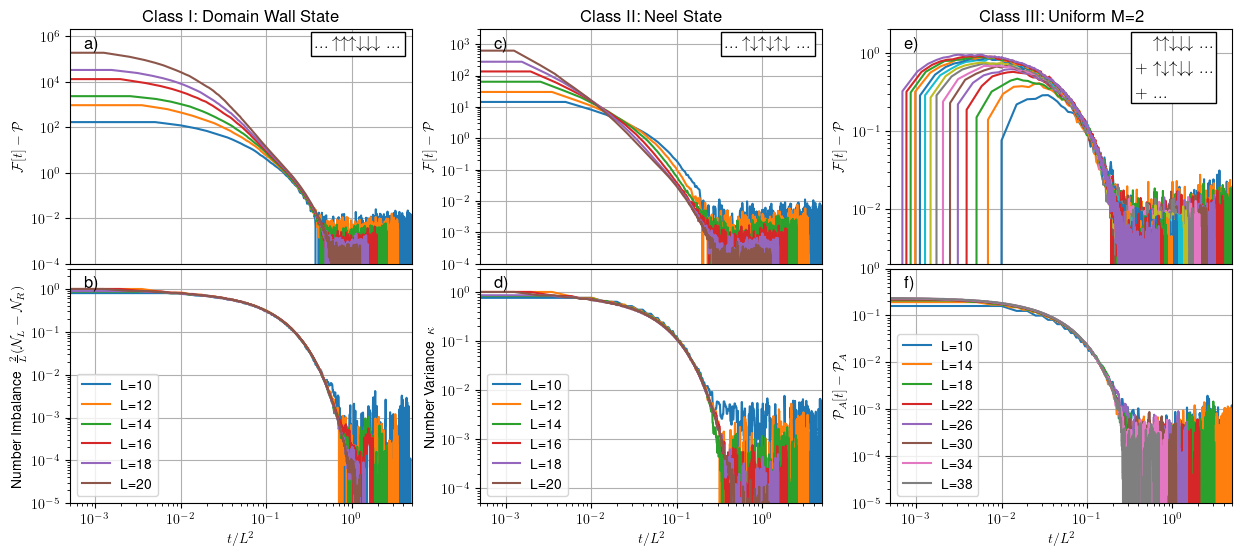

In [35]:
fig, axs = pyplot.subplot_mosaic([['a)', 'c)', 'e)'], ['b)', 'd)', 'f)']],
                              figsize=(15,6),
                              constrained_layout=True)

# ax = f.add_subplot(231)
# axins = f.add_subplot(234)
ax = axs['a)']
axins = axs['b)']

for l, purity in zip(ls[3:], pure_purities[3:]):
    ax.plot(0.5*numpy.arange(purity.shape[0]) / (l**2), (purity - 1), label=f"L={l}")
    
ax.set_ylabel(r'$\mathcal{F}[t] - \mathcal{P}$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([5e-4, 5e0])
ax.set_ylim([1e-4,2e6])
ax.grid()

for l,dens in zip(ls[3:], all_densities[3:]):
    axins.plot(0.5*numpy.arange(dens.shape[0])/l**2, dens[:,:l//2].mean(axis=-1) - dens[:,l//2:].mean(axis=-1), label=f"L={l}")

axins.set_xscale('log')
axins.set_yscale('log')
axins.set_xlim([5e-4, 5e0])
axins.set_ylim([1e-5,3e0])
axins.grid()
axins.set_ylabel(r'Number Imbalance~ $\frac{2}{L}(\mathcal{N}_L - \mathcal{N}_R)$')
axins.set_xlabel('$t/L^2$')
axins.legend(loc="lower left")

ax.set_title("Class I: Domain Wall State")

### NEXT SET OF PLOTS

# ax = f.add_subplot(232)
# axins = f.add_subplot(235)
ax = axs['c)']
axins = axs['d)']

# for d, l, purity in zip(neel_hilbert_space_sizes[4:], neel_ls[4:], neel_purities[4:]):
#     ax.plot(numpy.arange(len(purity))/(l**2), numpy.abs(purity - 1), label=f"L={l}")
for d, l, purity in zip(neel_hilbert_space_sizes[4:], neel_ls[4:], neel_purities[4:]):
    ax.plot(0.5*numpy.arange(len(purity))/(l**2), purity - 1, label=f"L={l}")

ax.set_ylabel(r'$\mathcal{F}[t] - \mathcal{P}$')
# ax.set_xlabel(r'$t/L^2$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-4,3e3])
ax.set_xlim([5e-4, 5e0])
ax.grid()

for l,v in zip(neel_ls[4:], neel_variances[4:]):
    axins.plot(0.5*numpy.arange(len(v))/l**2, 1.0 - v/haar_theory_variance(l,l/2,l/2), label=f'L={l}')

# for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
#     axins.plot(numpy.arange(len(purity)) / (l**2), purity, c='green', alpha=0.5)

axins.set_yscale('log')
axins.set_ylim([5e-5, 3e0])
axins.set_xlim([5e-4, 5e0])
axins.set_ylabel(r'Number Variance~ $\kappa$')
axins.set_xscale('log')
axins.set_yscale('log')
axins.set_xlabel('$t/L^2$')
axins.grid()
axins.legend(loc="lower left")


ax.set_title("Class II: Neel State")

### NEXT SET OF PLOTS

# ax = f.add_subplot(233)
# axins = f.add_subplot(236)
ax = axs['e)']
axins = axs['f)']

# for n, purity in zip(uniform_ls[1:], uniform_pure_purities[1:]):
#     l = len(purity)
#     ax.plot(numpy.arange(l)/(n**2), purity - 1, label=f"N={n}")

for n, purity in zip(subsystem_ns[4:], subsystem_all_purities[4:]):
    ax.plot(0.5*numpy.arange(len(purity))/(n**2), purity - 1, label=f"N={n}")

ax.set_ylabel(r'$\mathcal{F}[t] - \mathcal{P}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([2e-3,2e0])
ax.set_xlim([5e-4,5e0])
ax.grid()

for n,trace_purity in zip(subsystem_ns[4::2], subsystem_all_trace_purities[4::2]):
    axins.plot(0.5*numpy.arange(len(trace_purity))/n**2, trace_purity - theory(n), label=f"L={n}")
axins.set_xscale('log')
axins.set_yscale('log')
axins.set_xlabel('$t/L^2$')
axins.set_ylabel(r'$\mathcal{P}_A[t] - \mathcal{P}_A$')
axins.set_ylim([1e-5,1e0])
axins.set_xlim([5e-4,5e0])
axins.legend(loc='lower left')
axins.grid()

ax.set_title("Class III: Uniform M=2")

for label, ax in axs.items():
    # label physical distance in and down:
    trans = matplotlib.transforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
    

states = [
    r"$... \uparrow \uparrow \uparrow \downarrow \downarrow \downarrow ...$",
    r"$... \uparrow \downarrow \uparrow \downarrow \uparrow \downarrow ...$",
    r"\begin{align*}&\uparrow \uparrow \downarrow \downarrow \downarrow ... \\ + &\uparrow \downarrow \uparrow \downarrow \downarrow ... \\ + &~... \end{align*}"
]
    
for l, state in zip(['a)', 'c)', 'e)'], states):
    ax = axs[l]
    # label physical distance in and down:
    trans = matplotlib.transforms.ScaledTranslation(2.45, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, state, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='white', edgecolor='black', pad=3.0))
    
for l in ['a)', 'c)', 'e)']:
    axs[l].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
   
pyplot.subplots_adjust(top=0.9,hspace=0.02)

pyplot.savefig('all_plots.pdf')

pyplot.show()